In [88]:
from numpy import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [89]:
%matplotlib notebook

In [90]:
D = 1
t0 = .1
t_array = linspace(t0,.8,101)
x_array = linspace(0,2,1000)
x,t = meshgrid(x_array,t_array)
Z2tot = (x**2*(t0/t)**1.0*exp(-x**2/(2*D*t)))/(4*D**2*t**2)

<IPython.core.display.Javascript object>


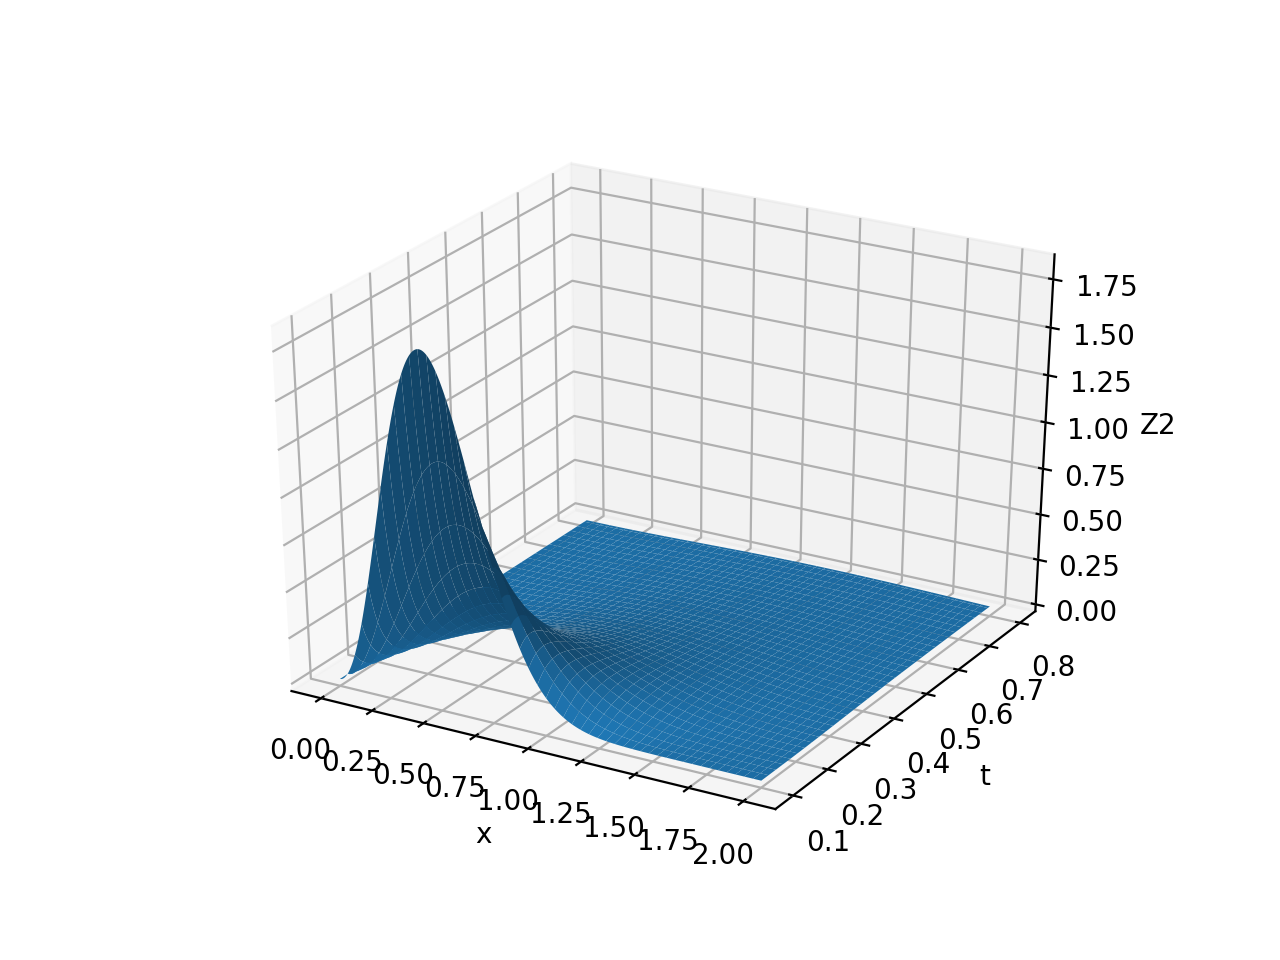

Text(0.5,0,'Z2')

In [91]:
ax = plt.figure().gca(projection='3d') # Set up a three dimensional graphics window 
ax.plot_surface(x,t, Z2tot) # Make th1 mesh plot
ax.set_xlabel('x') # Label axes
ax.set_ylabel('t')
ax.set_zlabel('Z2')

In [92]:
Z2totSize = size(Z2tot)
Z2tot_long = reshape(Z2tot, Z2totSize)
mybins = linspace(0,2,10)
counts, bins = histogram(Z2tot_long,mybins)
print(counts)
print(bins)
print('ratio = ', counts[0]/counts[-1])
counts = counts/sum(counts)

[91536  5315  1888   957   564   340   213   128    59]
[ 0.          0.22222222  0.44444444  0.66666667  0.88888889  1.11111111
  1.33333333  1.55555556  1.77777778  2.        ]
ratio =  1551.45762712


<IPython.core.display.Javascript object>


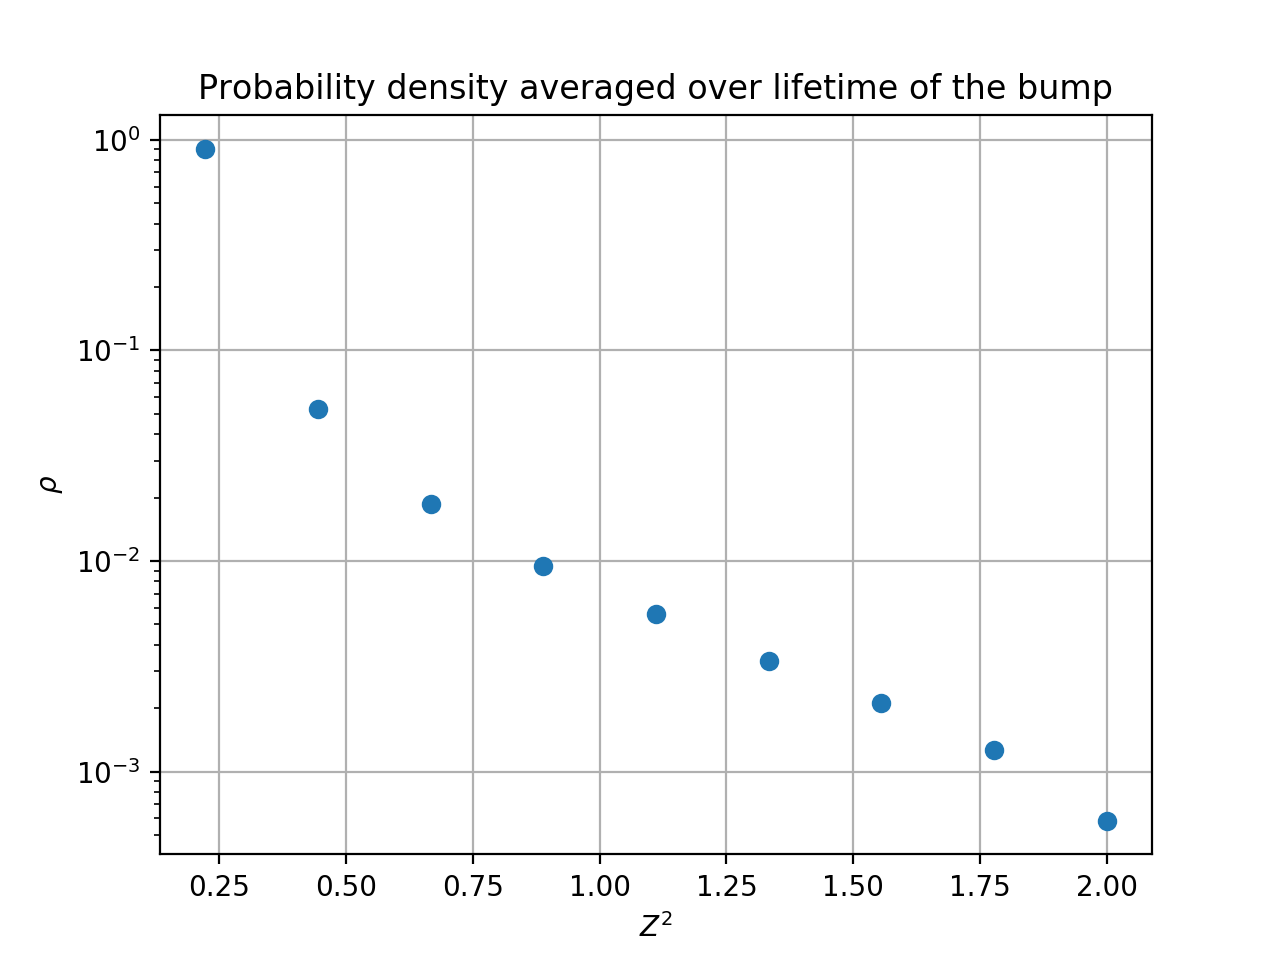

Text(0.5,1,'Probability density averaged over lifetime of the bump')

In [93]:
plt.figure()
plt.semilogy(bins[1:], counts, 'o', label='Numerical result')
plt.grid(True)
plt.xlabel('$Z^2$')
plt.ylabel(r'$\rho$')
plt.grid(True)
plt.title('Probability density averaged over lifetime of the bump')

<IPython.core.display.Javascript object>


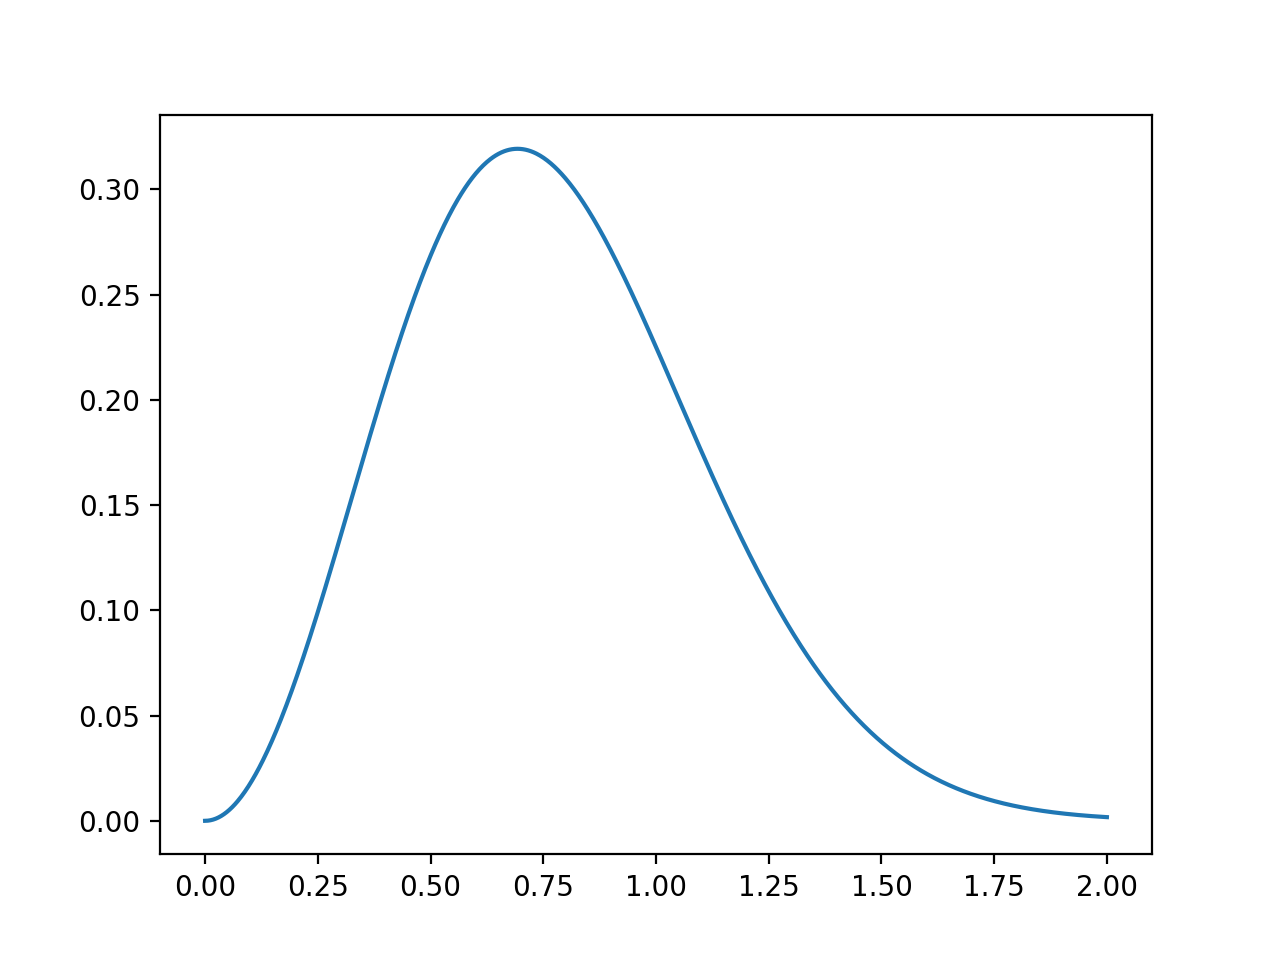

In [94]:
Z2totslice = Z2tot[20,:]
plt.figure()
plt.plot(x_array,Z2totslice)

<IPython.core.display.Javascript object>


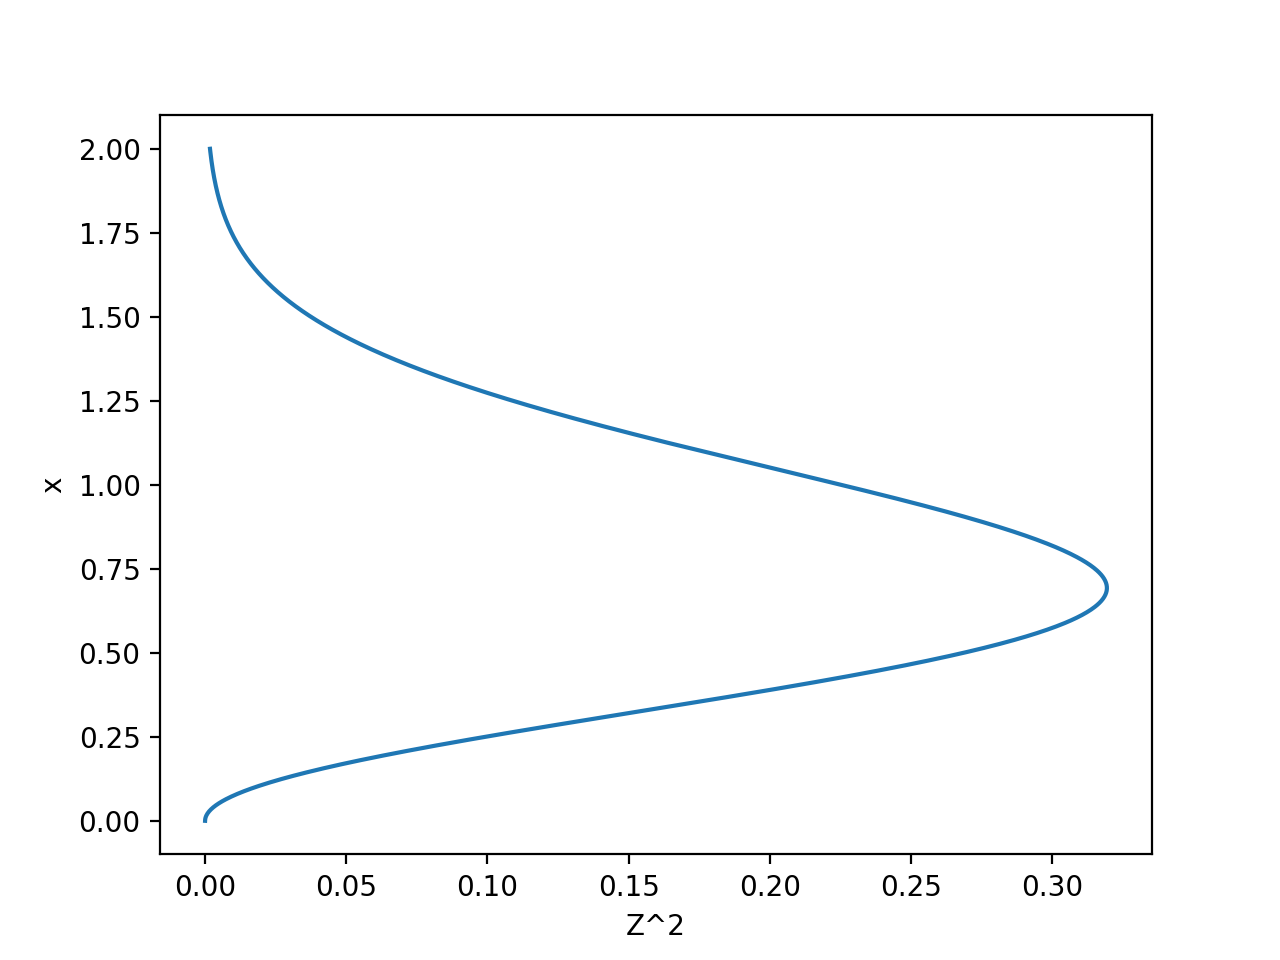

Text(0,0.5,'x')

In [95]:
plt.figure()
plt.plot(Z2totslice,x_array)
plt.xlabel('Z^2')
plt.ylabel('x')

<IPython.core.display.Javascript object>


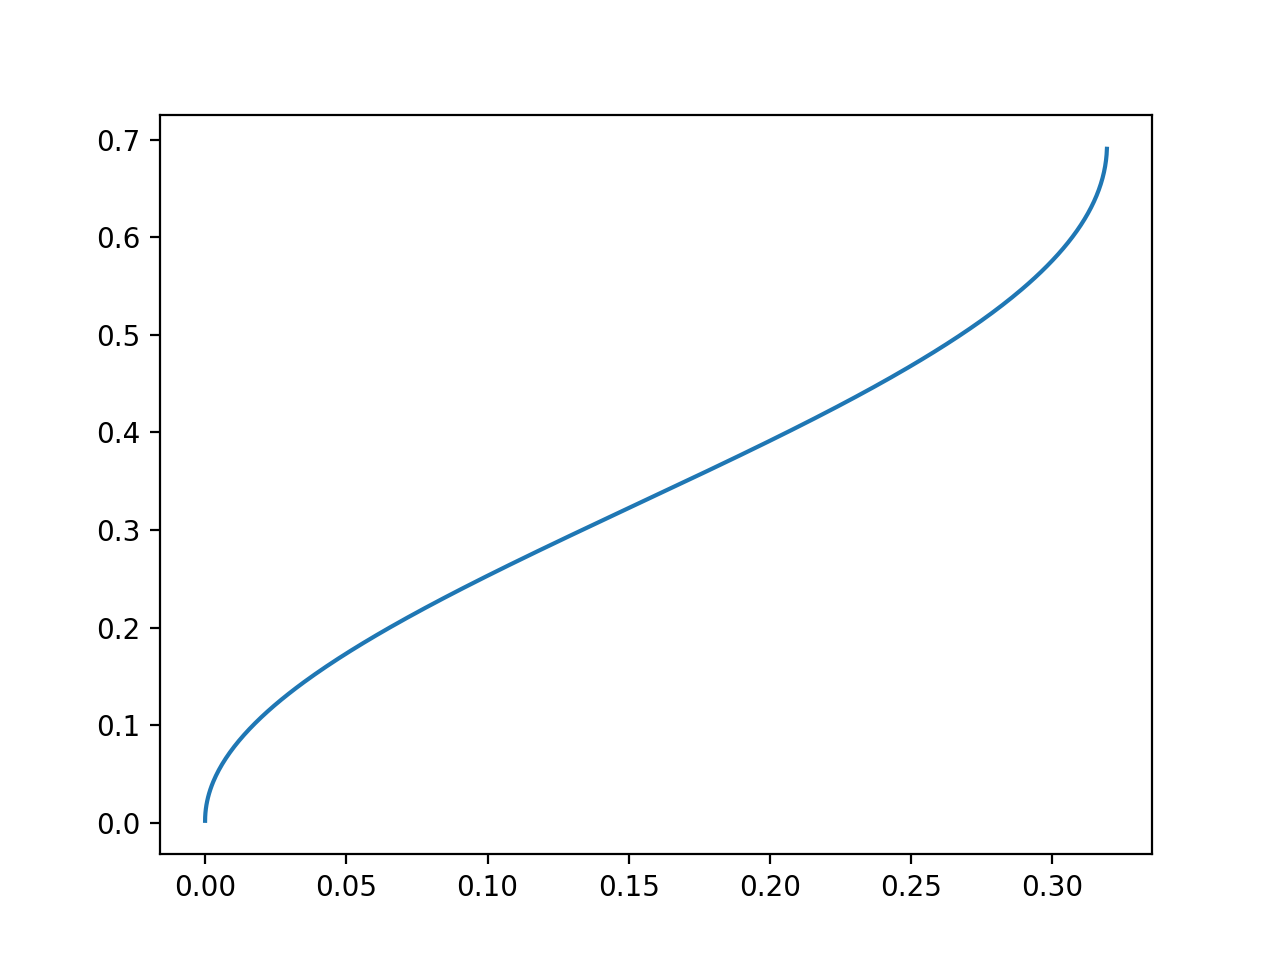

<IPython.core.display.Javascript object>


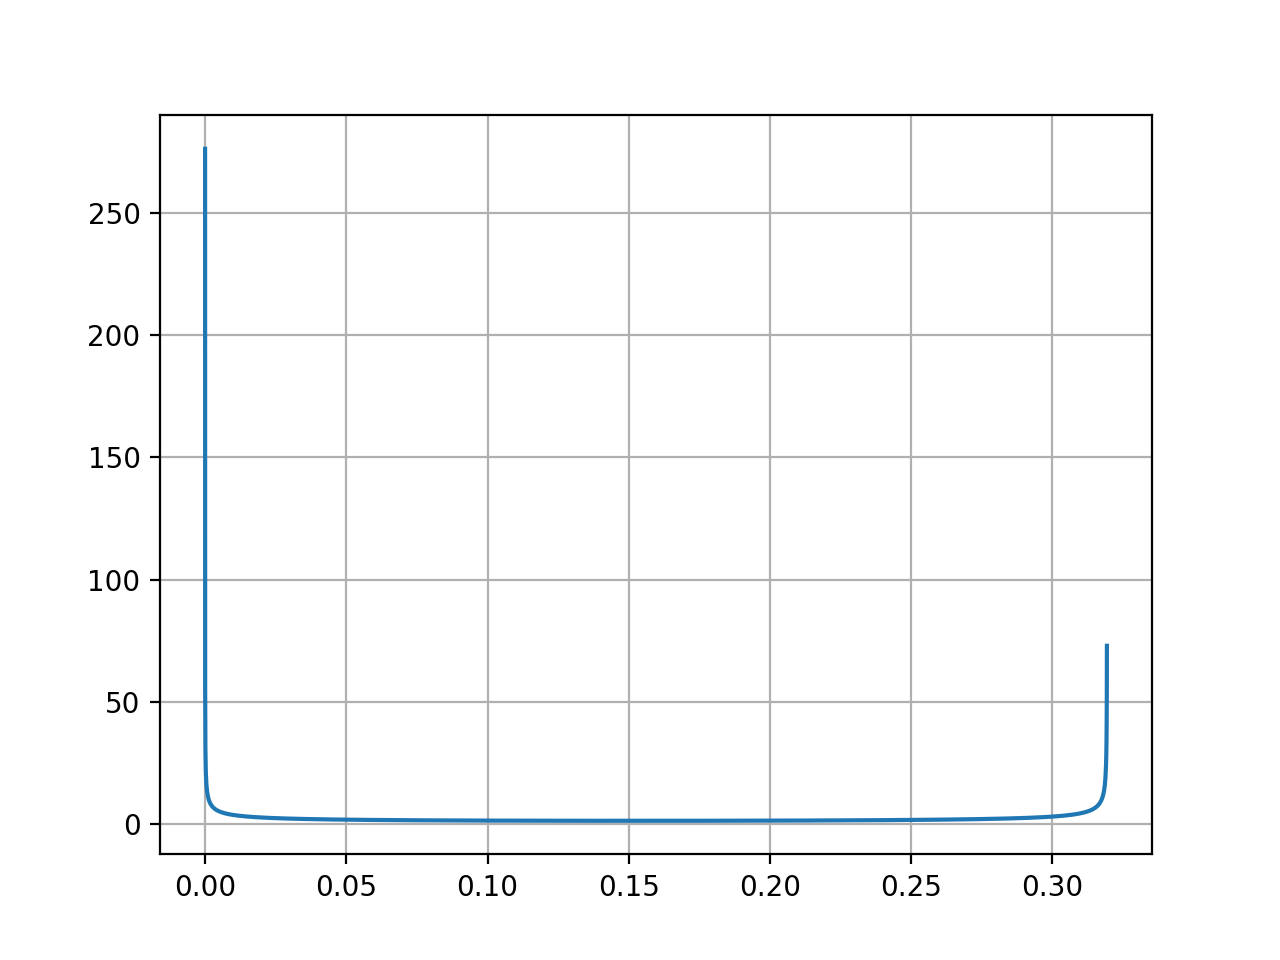

In [96]:
dxdZ2 = diff(x_array)/diff(Z2totslice)
idxdZ2 = squeeze(argwhere(dxdZ2>0))
jdxdZ2 = argwhere(dxdZ2<0)
Z2_branch1 = Z2totslice[idxdZ2]
DeltaZ2_branch1 = diff(Z2_branch1)
x_branch1 = x_array[idxdZ2]
dxdZ2_branch1 = dxdZ2[idxdZ2]
#print(DeltaZ2_branch1)


X_Z2 = x_branch1[0:-1]*DeltaZ2_branch1
x_prime_Z2 = dxdZ2_branch1[0:-1]*DeltaZ2_branch1
#print(X_Z2)
#rhoc_branch1 = cumsum(X_Z2)
rhoc_branch1 = cumsum(x_prime_Z2)

#print(dxdZ2[idxdZ2])
#print(dxdZ2[jdxdZ2])
rho_branch1 = diff(rhoc_branch1)/DeltaZ2_branch1[0:-1]

plt.figure()
plt.plot(Z2_branch1[0:-1], rhoc_branch1)

plt.figure()
plt.plot(Z2_branch1[0:-2], rho_branch1)
plt.grid(True)


#plt.plot(Z2_branch1, x_branch1)
#plt.figure()
# plt.semilogy(Z2totslice[idxdZ2],dxdZ2[idxdZ2],'ko',label='x small leg')
# plt.semilogy(Z2totslice[jdxdZ2],-dxdZ2[jdxdZ2],'ro',label='x big leg')
# plt.grid(True)
# plt.legend()

In [97]:
#func = x_array**2
#print(size(diff))
#df = diff(func)
#print(size(Z2totslice[:99]))
#probfunc = (x_array[:99])*((func[:99]) + df) - (x_array[:99])*(func[:99])
# diff = diff(probfunc)/diff(x_array[:99])
#probfunc = (x_array[((Z2totslice[:-1]) + diff(Z2totslice))] - (x_array[:9-1])*(Z2totslice[:-1])



In [98]:
size(Z2totslice[:-1])

999

In [99]:
# deriv = diff(probfunc)/diff(Z2totslice[:99])
# plt.figure()
# plt.semilogy(Z2totslice[:98], deriv,'ko')